# Analisis de la base de datos de Asics proporcionada

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar Bibliotecas

from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

### Importar los Datos

In [ ]:
ruta_maia = "/content/drive/MyDrive/Datasets/Caso Asics - Datos.xlsx"
ruta_meli = "/content/drive/MyDrive/UCEMA/3er año/Analitica de Negocios/TP Final: Asics - Analítica de Negocios/Caso Asics - Datos.xlsx"

df = pd.read_excel(ruta_meli)
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca
0,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike
1,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike
2,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike
3,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike
4,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger


### Limpieza de Datos

In [ ]:
df.dtypes

Nombre Semana     object
Año                int64
Semestre          object
Trimestre         object
Mes               object
Dia del Mes       object
Marca             object
Segmento          object
Mercado           object
Cantidad           int64
Facturación      float64
Precio           float64
Sub Marca         object
dtype: object

In [ ]:
#Convertir la Fecha a Tipo "datetime".

def dia_de_semana(fecha):
  patron = r"(\w+), (\d+) de (\w+) de (\d+)"
  resultado = re.match(patron, fecha)
  if resultado:
    return resultado.group(1)
  else:
    return None

def numero_dia(fecha):
  patron = r"(\w+), (\d+) de (\w+) de (\d+)"
  resultado = re.match(patron, fecha)
  if resultado:
    return resultado.group(2)
  else:
    return None

def mes(fecha):
  patron = r"(\w+), (\d+) de (\w+) de (\d+)"
  resultado = re.match(patron, fecha)
  if resultado:
    return resultado.group(3)
  else:
    return None

def año(fecha):
  patron = r"(\w+), (\d+) de (\w+) de (\d+)"
  resultado = re.match(patron, fecha)
  if resultado:
    return resultado.group(4)
  else:
    return None

meses = {
    "Enero": 1,
    "Febrero": 2,
    "Marzo": 3,
    "Abril": 4,
    "Mayo": 5,
    "Junio": 6,
    "Julio": 7,
    "Agosto": 8,
    "Setiembre": 9,
    "Octubre": 10,
    "Noviembre": 11,
    "Diciembre": 12
}

def numero_mes(mes):
  return meses[mes]

df["Día de la Semana"] = df.apply(lambda row: dia_de_semana(row["Dia del Mes"]), axis = 1)
df["Número de Día"] = df.apply(lambda row: numero_dia(row["Dia del Mes"]), axis = 1)
df["Mes"] = df.apply(lambda row: mes(row["Dia del Mes"]), axis = 1)
df["Mes"] = df.apply(lambda row: numero_mes(row["Mes"]), axis = 1)
df["Año"] = df.apply(lambda row: año(row["Dia del Mes"]), axis = 1)
df['Fecha'] = pd.to_datetime({"year" : df["Año"],
                              "month" : df["Mes"],
                              "day" : df["Número de Día"]})

df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,Día de la Semana,Número de Día,Fecha
0,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike,Jueves,2,2020-01-02
1,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike,Jueves,2,2020-01-02
2,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike,Jueves,2,2020-01-02
3,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike,Jueves,2,2020-01-02
4,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike,Jueves,2,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,2,"Sabado, 26 de Febrero de 2022",Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics,Sabado,26,2022-02-26
25166,Semana 9,2022,S1-22,T1-22,2,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger,Sabado,26,2022-02-26
25167,Semana 9,2022,S1-22,T1-22,2,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger,Sabado,26,2022-02-26
25168,Semana 9,2022,S1-22,T1-22,2,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger,Sabado,26,2022-02-26


In [ ]:
#Valores Nulos
round(df.isnull().sum().sort_values(ascending=False)/len(df),2)

Nombre Semana       0.0
Año                 0.0
Semestre            0.0
Trimestre           0.0
Mes                 0.0
Dia del Mes         0.0
Marca               0.0
Segmento            0.0
Mercado             0.0
Cantidad            0.0
Facturación         0.0
Precio              0.0
Sub Marca           0.0
Día de la Semana    0.0
Número de Día       0.0
Fecha               0.0
dtype: float64

In [ ]:
#Valores Duplicados
filas_duplicadas = df[df.duplicated()]
len(filas_duplicadas)

0

In [ ]:
df.describe()

,Mes,Cantidad,Facturación,Precio
count,25170.000000,25170.000000,2.517000e+04,25170.000000
mean,6.125467,304.830075,2.849953e+06,9206.263772
std,3.570197,293.587805,3.179033e+06,1750.969002
min,1.000000,-1.000000,-9.477000e+03,3454.246626
25%,3.000000,118.250000,1.036191e+06,8181.376663
50%,6.000000,224.000000,1.922886e+06,8818.025701
75%,9.000000,406.000000,3.597554e+06,9818.016879
max,12.000000,7422.000000,8.434345e+07,13196.729654


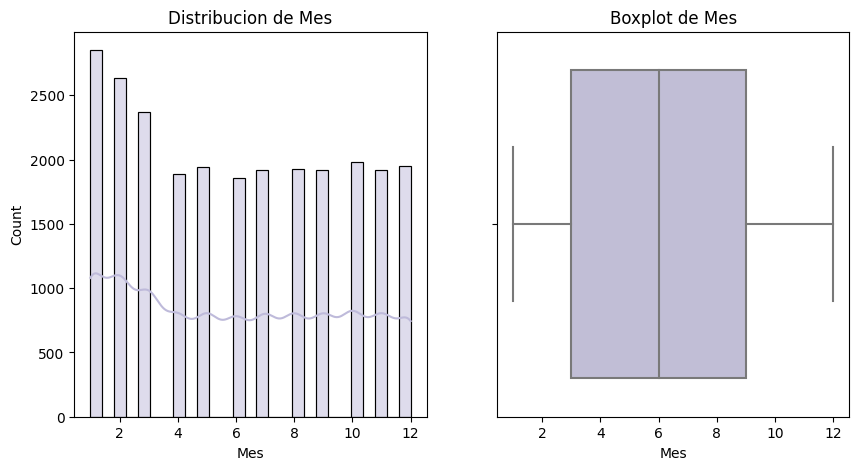

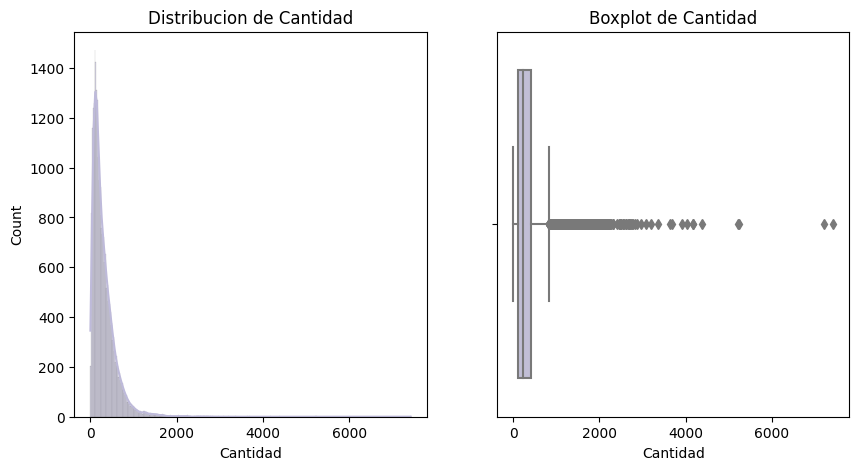

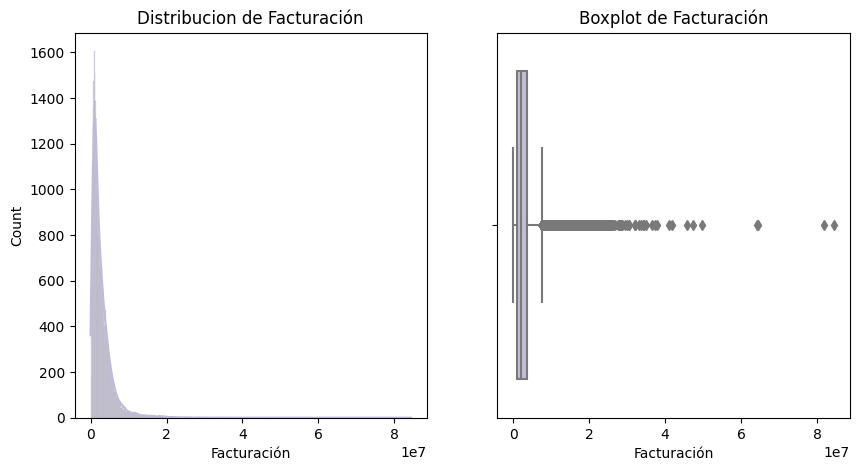

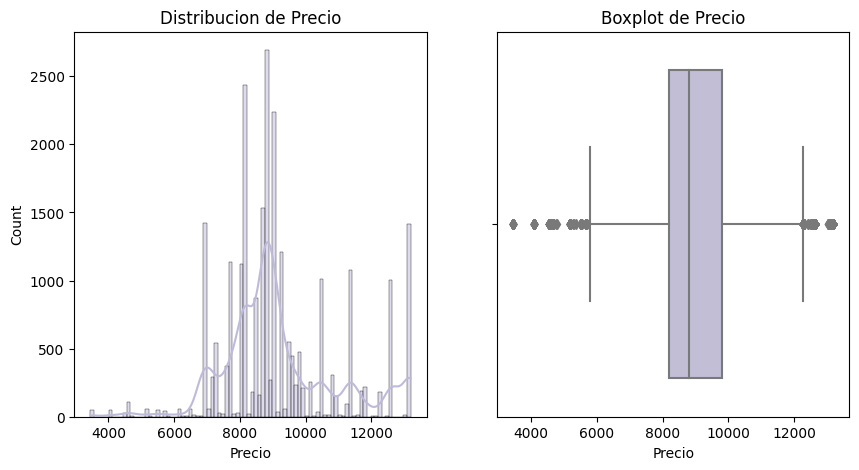

In [ ]:
#Outliers: Los números que más llamaron la atención a partir del describe() fueron los máximos de Cantidad y Facturación
columnas = df.select_dtypes(["int64", "float64"]).columns

for col in columnas:
  fig, ax = plt.subplots(1,2,figsize=(10,5))

  ax[0].set_title(f"Distribucion de {col}")
  sns.histplot(data = df, x = f"{col}", kde=True, ax = ax[0], color = "#BEBADA")

  ax[1].set_title(f"Boxplot de {col}")
  sns.boxplot(data = df, x = f"{col}", ax=ax[1], color = "#BEBADA")

  plt.show()

### Análisis Exploratorio

In [ ]:
df["Sub Marca"].value_counts()

Adidas            6400
Puma              6400
Nike              6365
Asics             3196
Onitsuka Tiger    1598
Asics Tiger       1211
Name: Sub Marca, dtype: int64

In [ ]:
df['mes_año'] = df['Fecha'].dt.to_period('M')
df['semana_año'] = df['Fecha'].dt.to_period('W-SAT')

#### Marcas

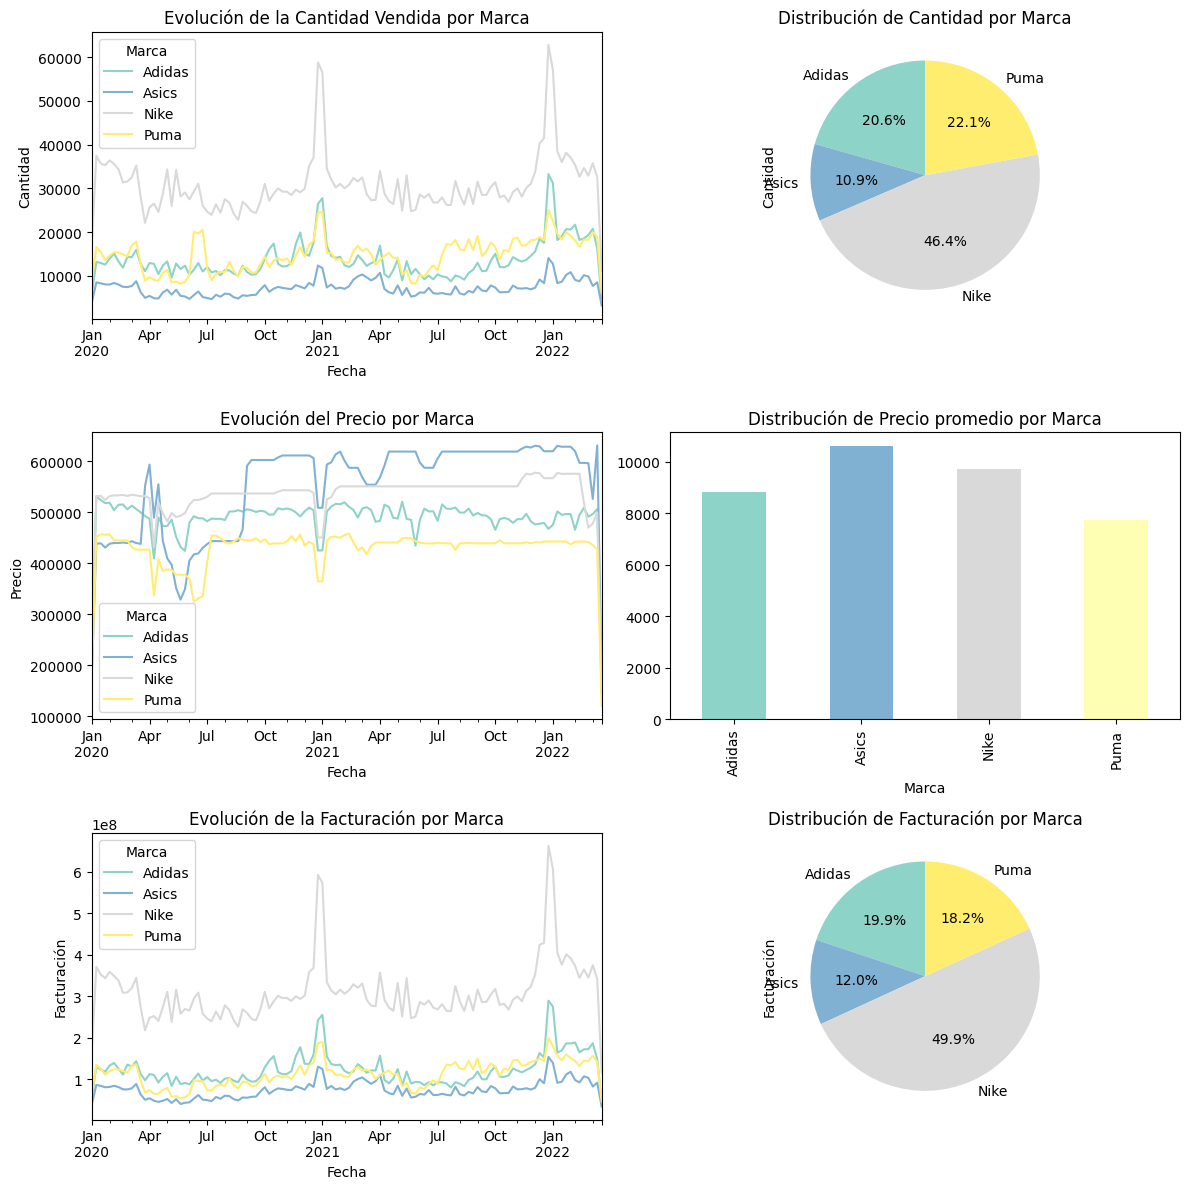

In [ ]:
# Definir la categoría
categoria = "Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7', '#80B1D3', '#D9D9D9','#FFFFB3']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

Se puede ver que Nike domina el mercado  de las zapatillas deportivos. Sin embargo podemos notar que Asics es aquella con precios mas altos, aunque todos se mantienen bastante parecidos. Como nos han comentado los clientes de Asics son inelasticos al precio, ya que confian plenamente en su calidad, siendo que su publico actual son corredores profesionales.

#### Segmentos

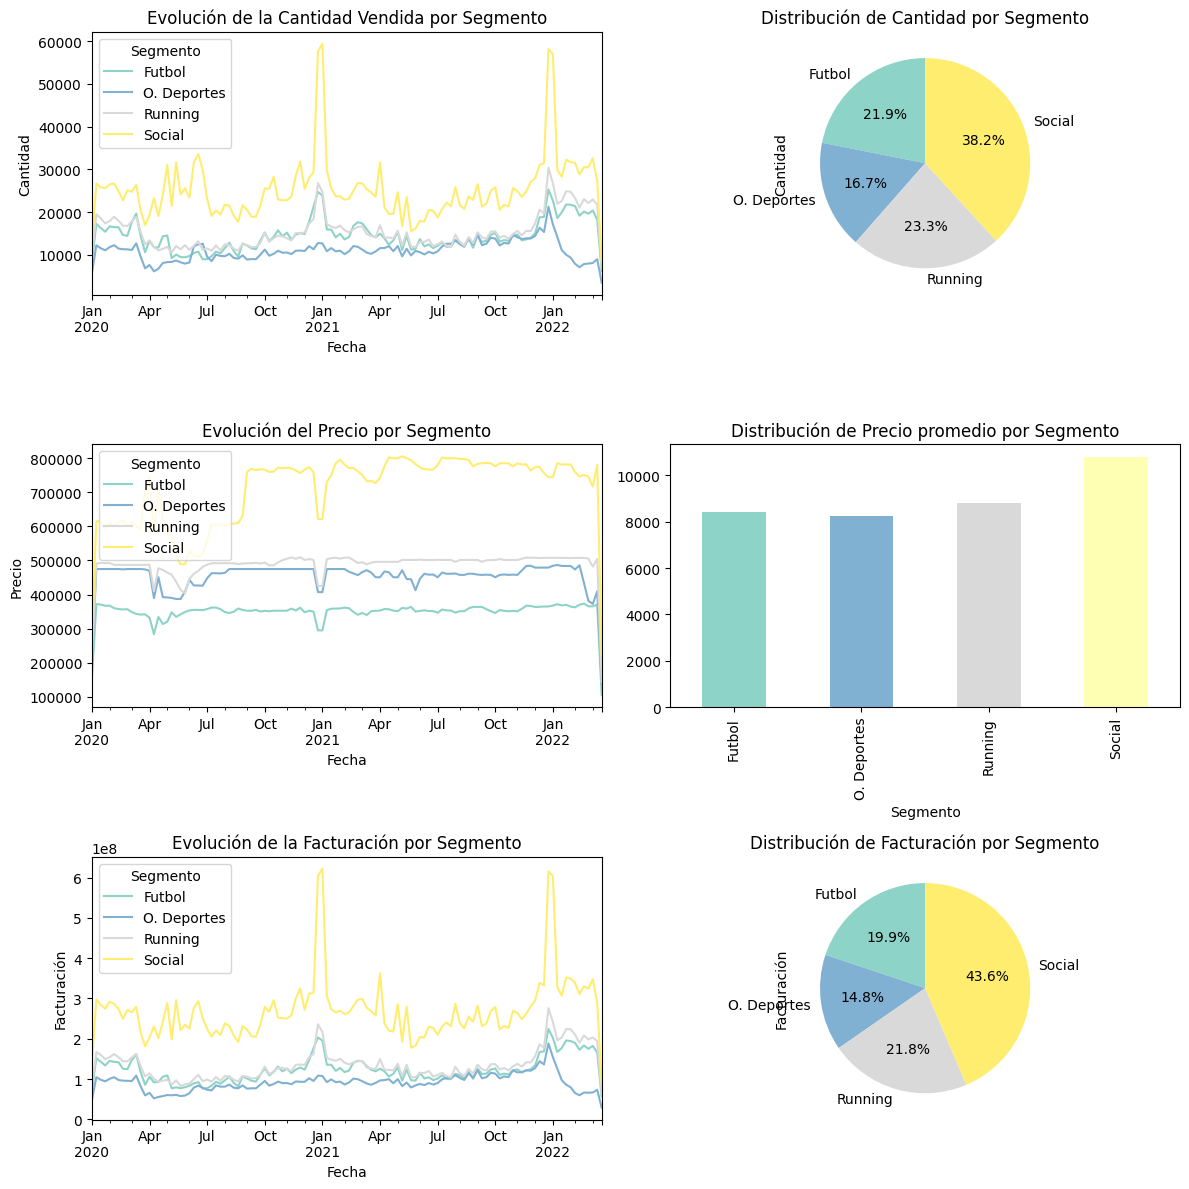

In [ ]:
# Definir la categoría
categoria = "Segmento"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7', '#80B1D3', '#D9D9D9','#FFFFB3']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El segmento del que mas productos se vende es del segmento social, seguido por running y luego futbol, esto se refleja en que social sea el que más factura, además de que es el que tiene precio promedio más alto.

#### Mercados

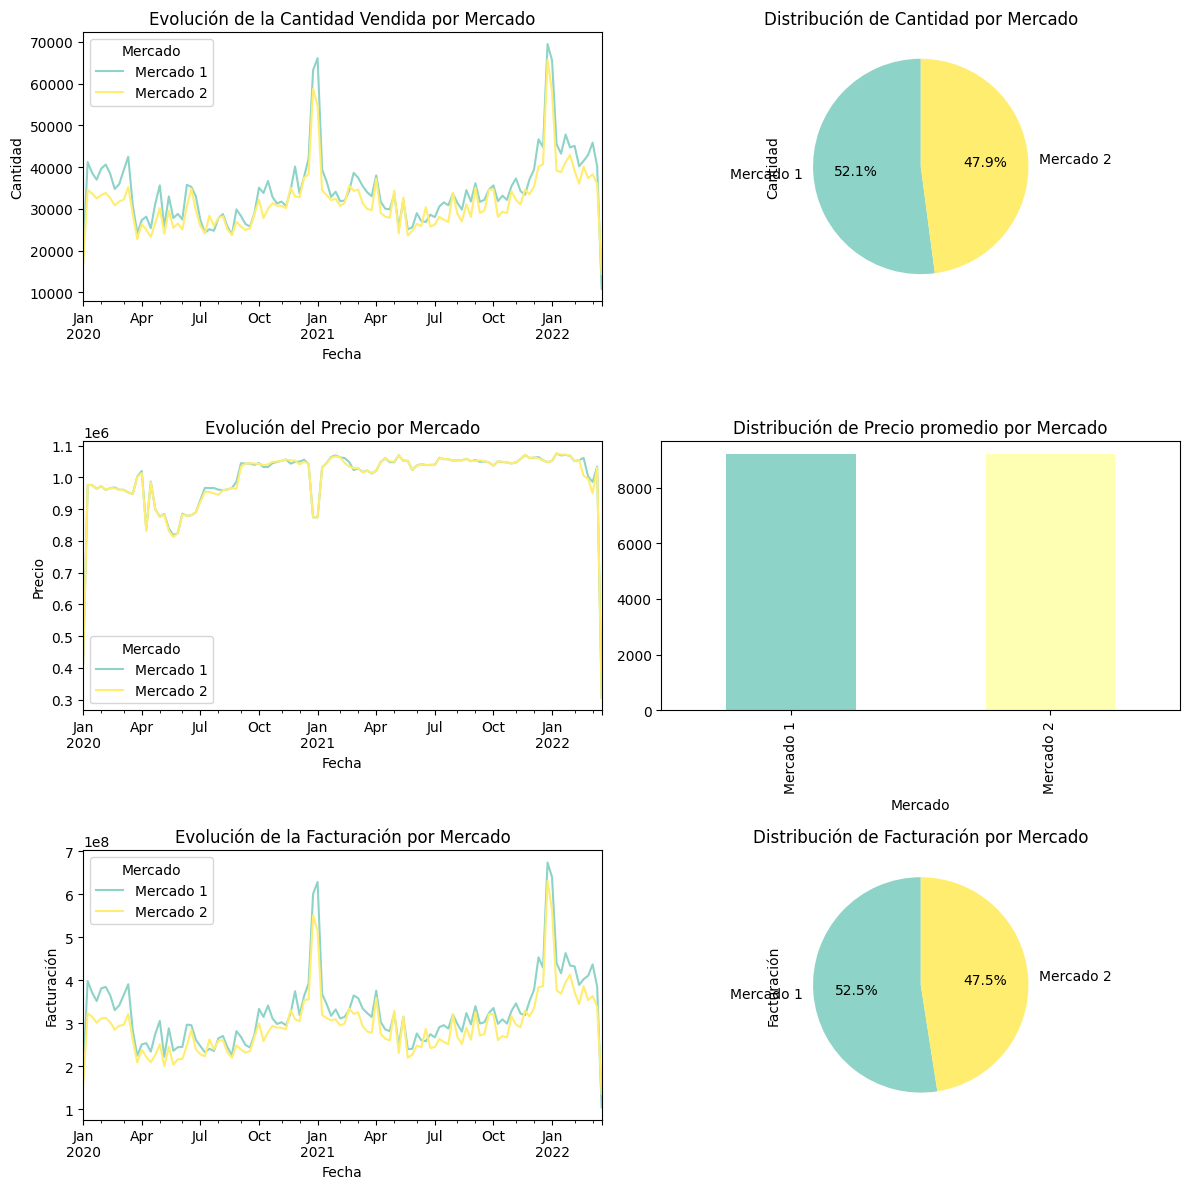

In [ ]:
# Definir la categoría
categoria = "Mercado"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#FFFFB3','#80B1D3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El tipo de mercado (siendo ubicaicon geografica del pais) no pareceria tener influencia relevante

#### ASICS

In [ ]:
#Para trabajar específicamente sobre Asics.

df_asics = df[df["Marca"] == "Asics"]

##### Submarcas

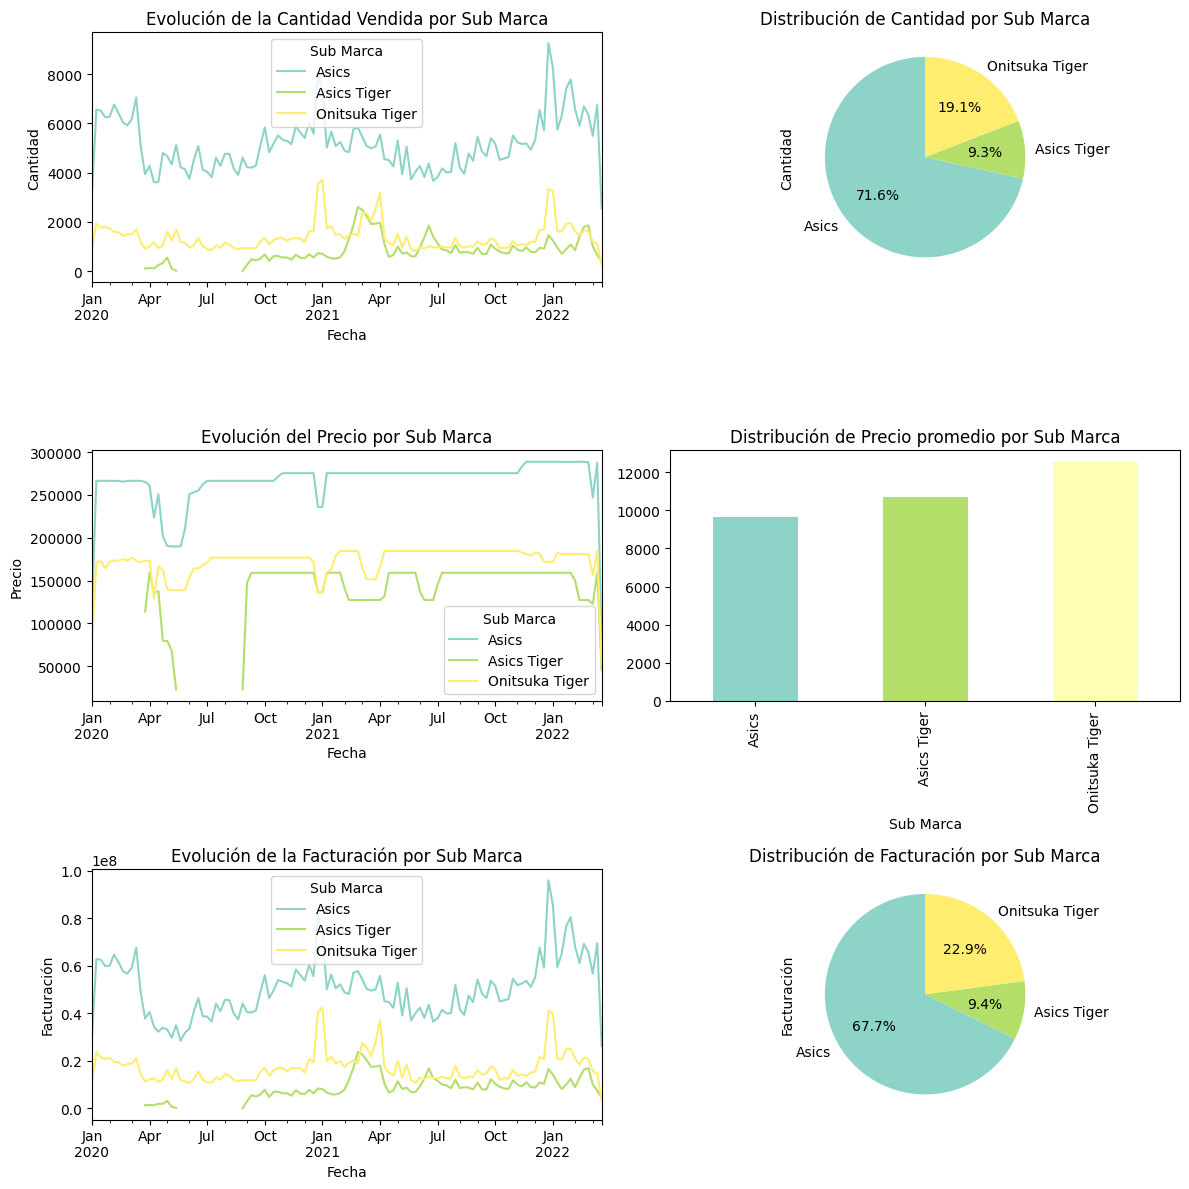

In [ ]:
# Definir la categoría
categoria = "Sub Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

In [ ]:
df_asics.groupby(['Sub Marca', 'Segmento']).agg(cantidad = ('Cantidad', 'sum'))

cantidad
Sub Marca      Segmento             
Asics          O. Deportes    246073
               Running        350632
Asics Tiger    Social          77911
Onitsuka Tiger Social         159305

Cuenta con tres submarcas: **Asics Onitsuka Tiger y Ascs Tiger**, siendo que la primera esta enfocada en deportes (running y otros deportes) y las dos últimas en lifestyle (social).

Asics es al sub marca que vende mayor cantidad (72%), siendo pro lo tanto la que más factura, habiendo generado el 68% de los ingresos del periodo). Sin embargo, Onitsuka Tiger es la de mayor precio promedio, siendo que la categoría social tiene productos de mayor precios

##### Segmentos

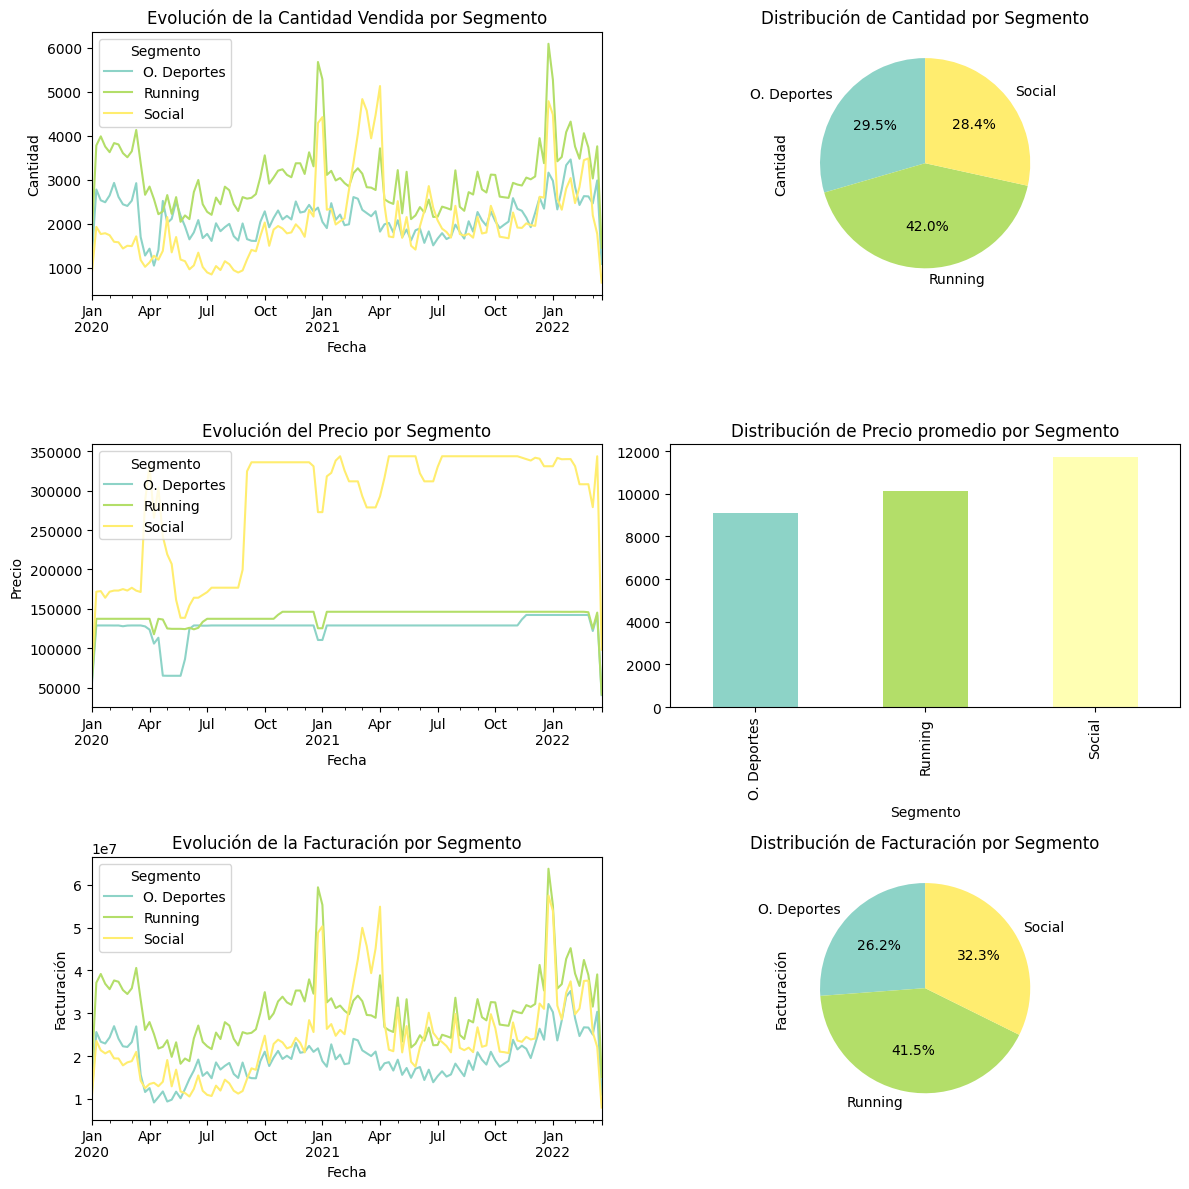

In [ ]:
# Definir la categoría
categoria = "Segmento"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El segmento del cual más se venden es running, siendo social el de mayor cantidad vendida, mientras que social es le segmento de mayor precio promedio, llevando a que el segmento de mayor facturación sea running (41,5%), seguido por social (32,3%)

##### Mercado

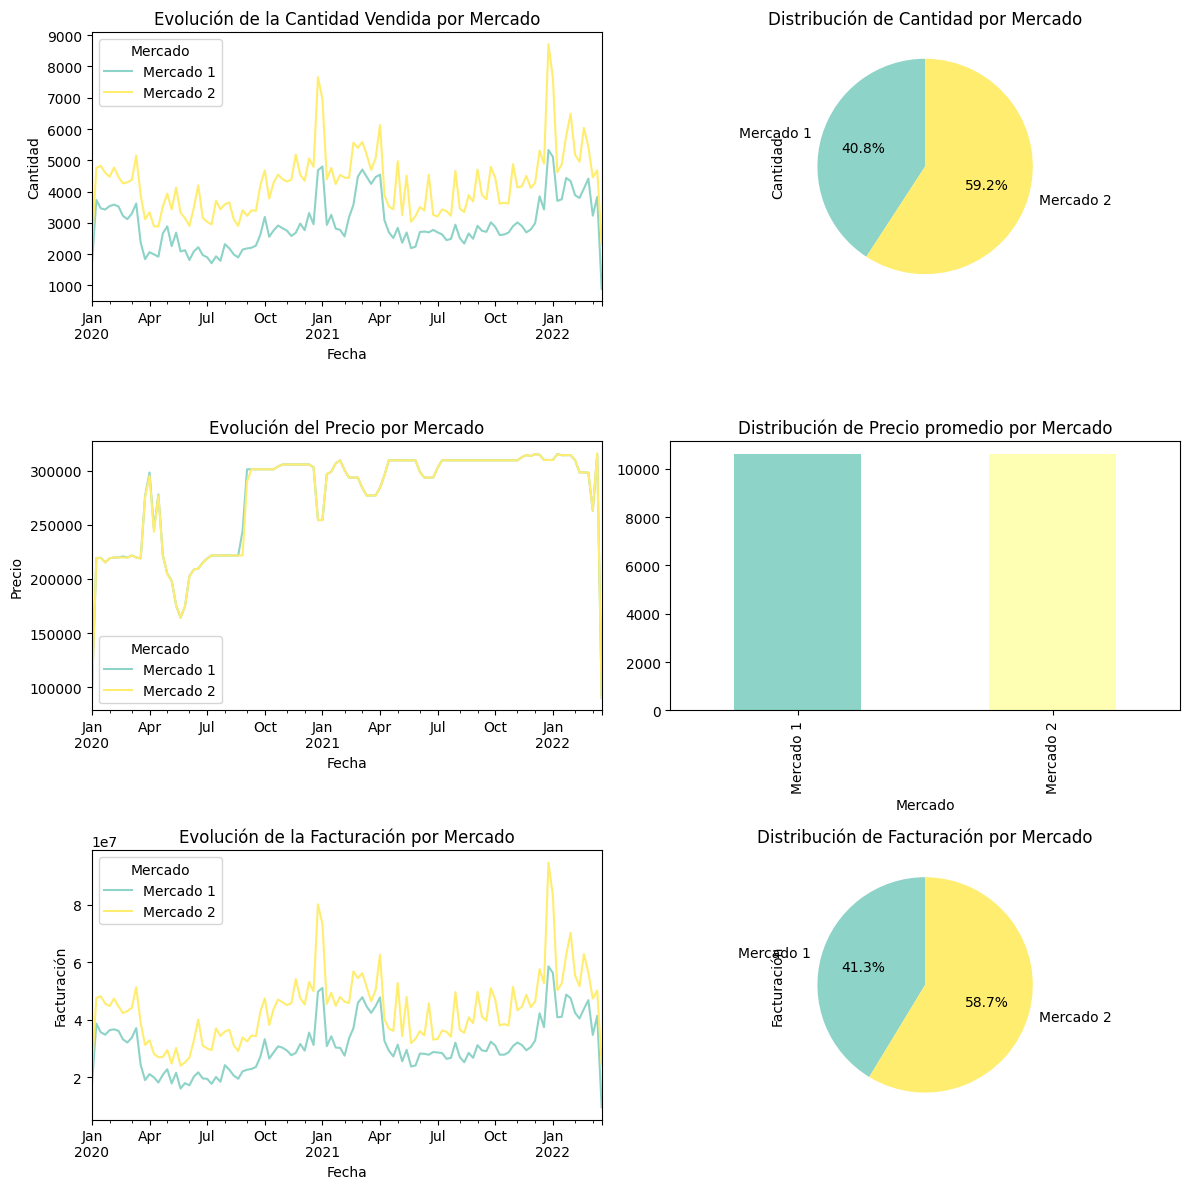

In [ ]:
# Definir la categoría
categoria = "Mercado"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#FFFFB3', '#B3DE69', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El gráfico de Distribución por Precio no tiene sentido.

La distinción de mercado parecería no tener tanta relevancia, como vemos el precio es igual en ambos mercados (tiene sentido ya que es el mismo país), siendo que se vende mayor cantidad y se factura mas en el Mercado 2.

### Comaparacion entre marcas de segmentos

In [ ]:
df.columns

Index(['Nombre Semana', 'Año', 'Semestre', 'Trimestre', 'Mes', 'Dia del Mes',
       'Marca', 'Segmento', 'Mercado', 'Cantidad', 'Facturación', 'Precio',
       'Sub Marca', 'Día de la Semana', 'Número de Día', 'Fecha', 'mes_año',
       'semana_año'],
      dtype='object')

In [ ]:
df.Segmento.unique()

array(['Futbol', 'Running', 'Social', 'O. Deportes'], dtype=object)

In [ ]:
futbol = df[df.Segmento == "Futbol"]
runing = df[df.Segmento == "Running"]
social = df[df.Segmento == "Social"]
odepo = df[df.Segmento == "O. Deportes"]

In [ ]:
futbol.Marca.unique()

array(['Nike', 'Adidas', 'Puma'], dtype=object)

#### Running

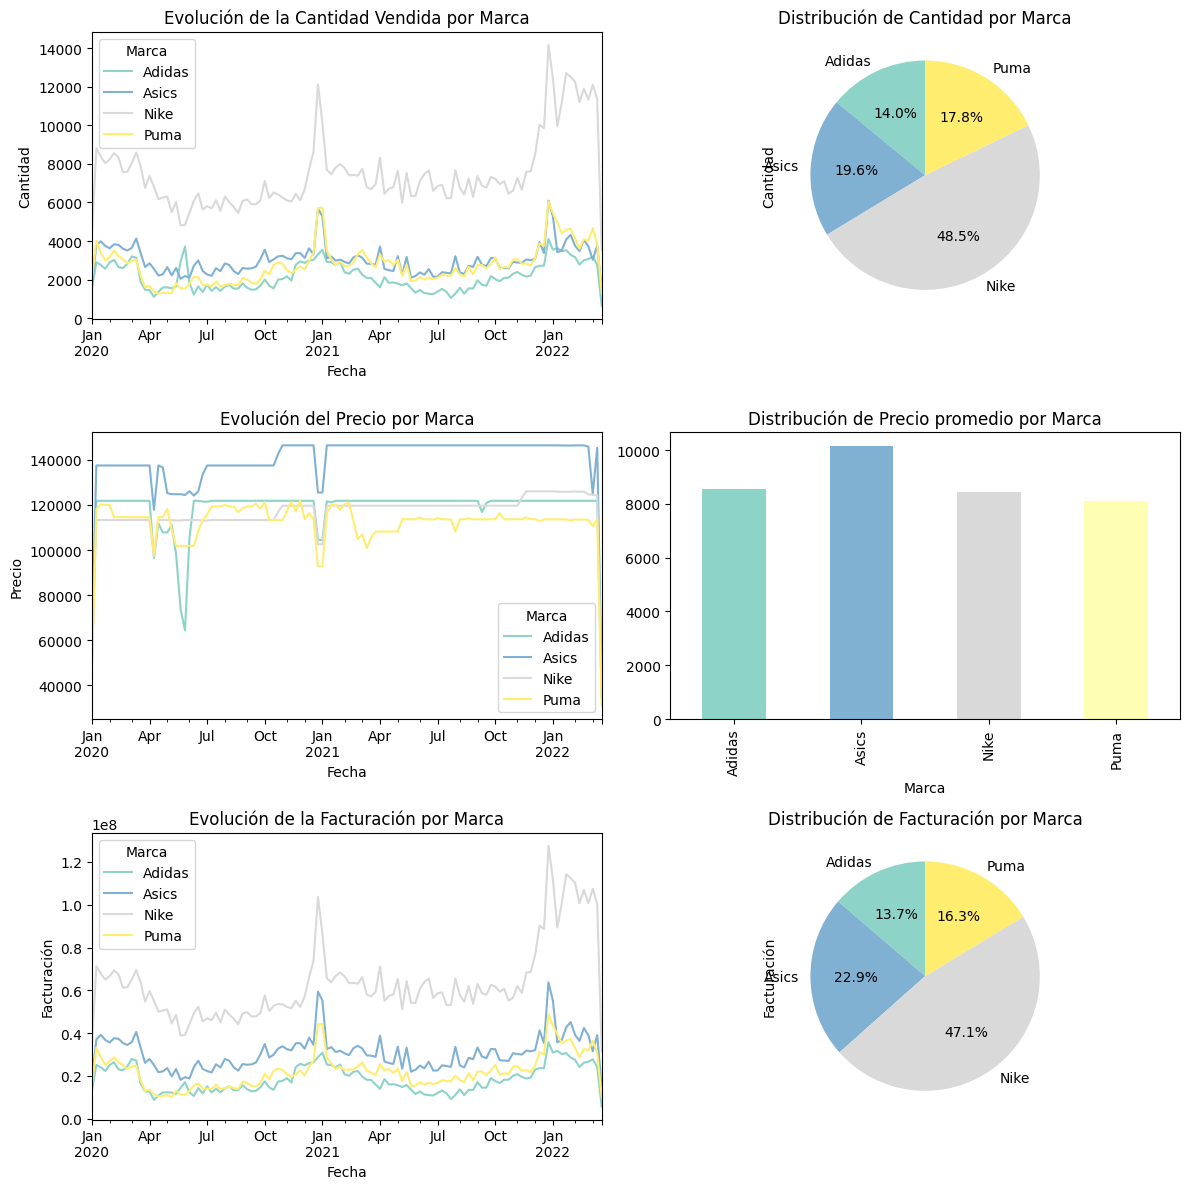

In [ ]:
# Definir la categoría
categoria = "Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = runing.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = runing.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = runing.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = runing.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7', '#80B1D3', '#D9D9D9','#FFFFB3']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = runing.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = runing.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

#### Social

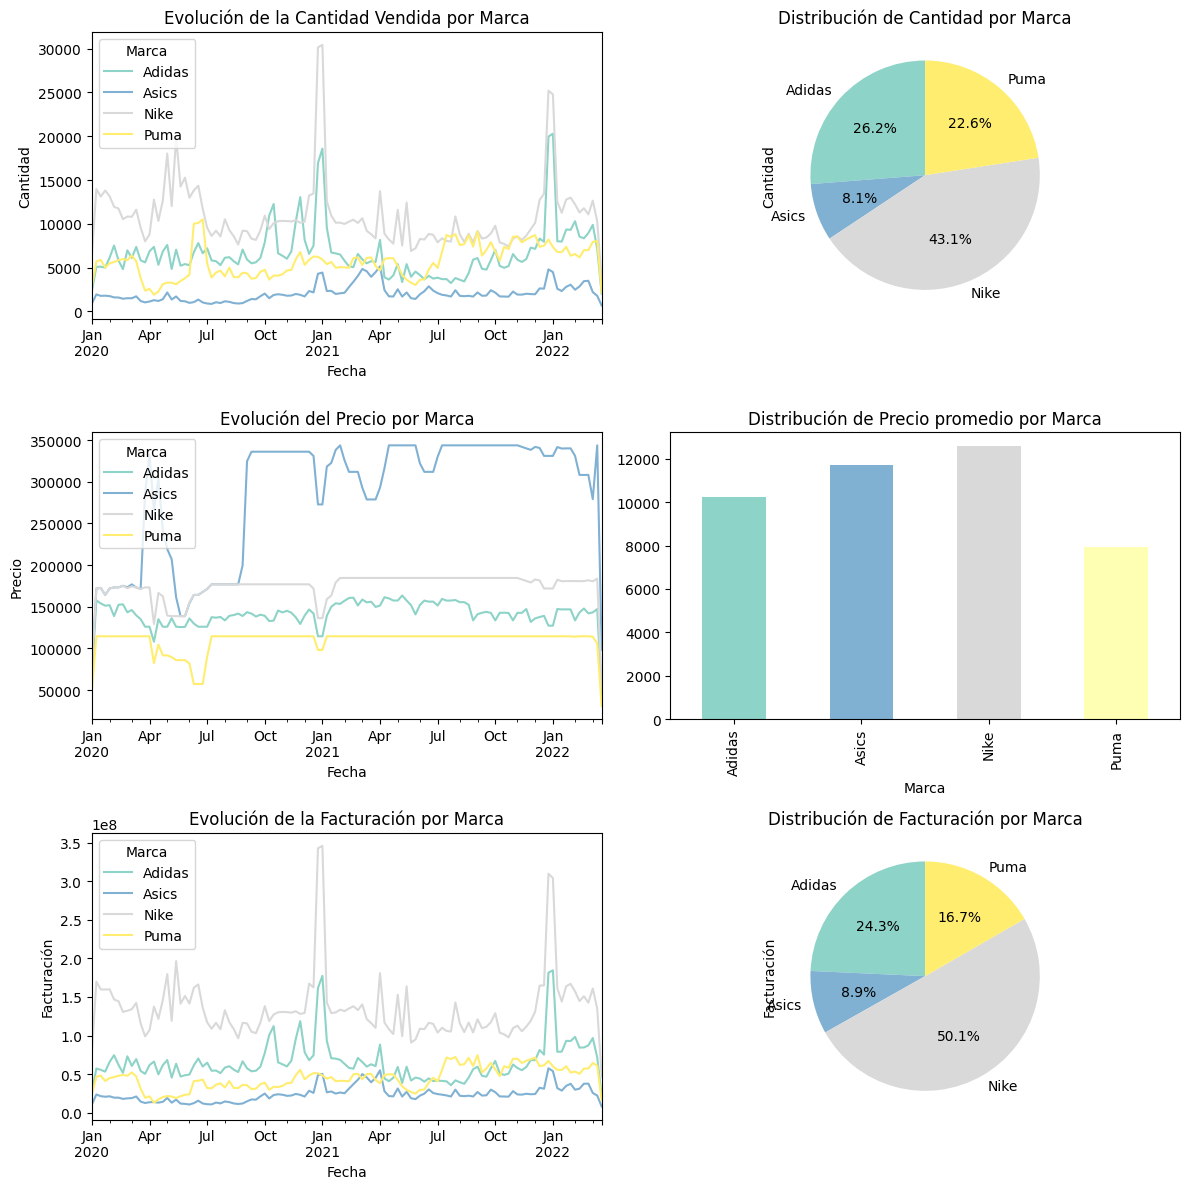

In [ ]:
# Definir la categoría
categoria = "Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = social.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = social.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = social.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = social.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7', '#80B1D3', '#D9D9D9','#FFFFB3']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = social.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = social.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

#### Otros deportes

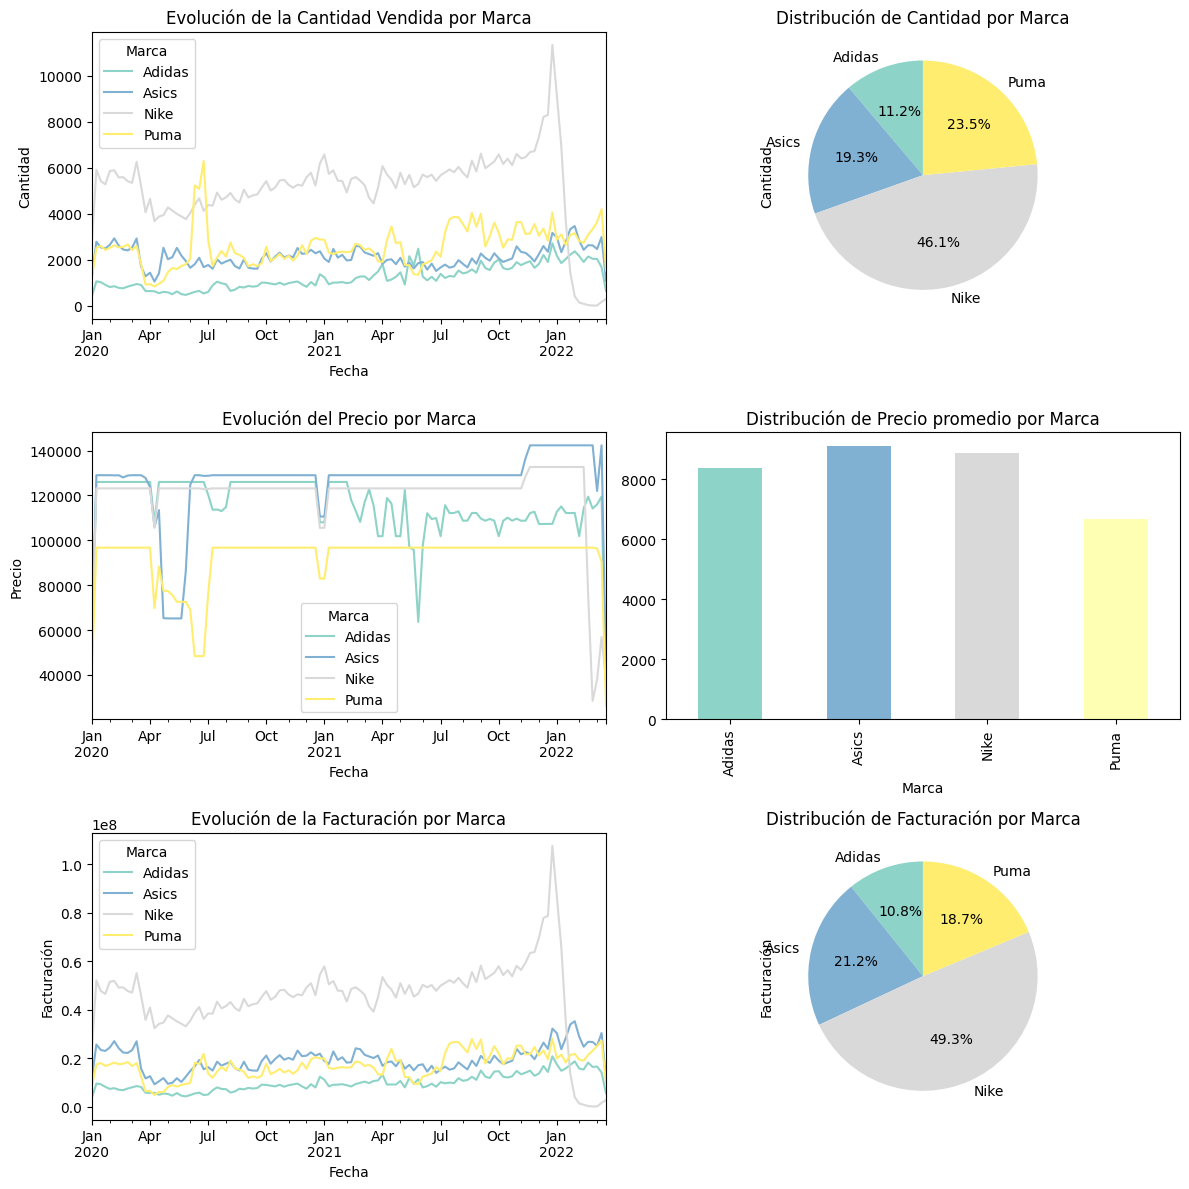

In [ ]:
# Definir la categoría
categoria = "Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = odepo.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = odepo.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = odepo.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = odepo.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7', '#80B1D3', '#D9D9D9','#FFFFB3']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = odepo.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = odepo.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

En todos los segmentos, Nike es el líder del mercado en venta de zapatillas. En el segmento de running Asics es la marca que tiene mayores precios gracias a la inelasticidad de precios de nuestros productos-clientes, ocupando un segundo lugar en la cantidad vendida y facturación de zapatillas para correr.

Sin embargo, en el segmento social, su precio le sigue a Nike, pero s relajado a un 9% de facturación en la totalidad del mercado, siendo que hay menor cantidad de ventas en este segmento. Podemos notar que es en este segmento que se logra una mayor facturación por nuestros competidores, logrando superar los 100000000. *Esto puede deberse a que Asics no logro crear un público fiel a lo que respecta en este segmento, siendo que sus precios no se alinean con el público meta de este mercado*


## Variables que influyen - Correlaciones con facturacion, precio y cantidad

In [ ]:
df_asics.head()

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,Día de la Semana,Número de Día,Fecha,mes_año,semana_año
19165,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Asics,O. Deportes,Mercado 1,128,1179499.86,9214.842656,Asics,Jueves,2,2020-01-02,2020-01,2019-12-29/2020-01-04
19166,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Asics,O. Deportes,Mercado 2,269,2478802.70,9214.879926,Asics,Jueves,2,2020-01-02,2020-01,2019-12-29/2020-01-04
19167,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Asics,Running,Mercado 1,209,2051962.00,9818.000000,Asics,Jueves,2,2020-01-02,2020-01,2019-12-29/2020-01-04
19168,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Asics,Running,Mercado 2,225,2209053.00,9818.013333,Asics,Jueves,2,2020-01-02,2020-01,2019-12-29/2020-01-04
19169,Semana 1,2020,S1-20,T1-20,1,"Jueves, 2 de Enero de 2020",Asics,Social,Mercado 1,127,1604772.00,12636.000000,Onitsuka Tiger,Jueves,2,2020-01-02,2020-01,2019-12-29/2020-01-04


In [ ]:
df_asics.columns

Index(['Nombre Semana', 'Año', 'Semestre', 'Trimestre', 'Mes', 'Dia del Mes',
       'Marca', 'Segmento', 'Mercado', 'Cantidad', 'Facturación', 'Precio',
       'Sub Marca', 'Día de la Semana', 'Número de Día', 'Fecha', 'mes_año',
       'semana_año'],
      dtype='object')

In [ ]:
df_asics['Día de la Semana'].unique()

array(['Jueves', 'Viernes', 'Sabado', 'Domingo', 'Lunes', 'Martes',
       'Miercoles'], dtype=object)

In [ ]:
df_asics['Sub Marca'].unique()

array(['Asics', 'Onitsuka Tiger', 'Asics Tiger'], dtype=object)

In [ ]:
df_asics.Segmento.unique()

array(['O. Deportes', 'Running', 'Social'], dtype=object)

In [ ]:
df_asics.Mercado.unique()

array(['Mercado 1', 'Mercado 2'], dtype=object)

### Conv ariabels encodeadas en una misma variable

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
variables_interes = ['Cantidad', 'Segmento', 'Mercado', 'Precio', 'Año', 'Mes', 'Dia del Mes', 'Facturación', 'Día de la Semana', 'Sub Marca']
df_filtered = df_asics[variables_interes]

In [ ]:

encoder_ordinal = OrdinalEncoder(categories=[['Asics', 'Asics Tiger','Onitsuka Tiger']])
df_filtered['Sub Marca'] = encoder_ordinal.fit_transform(df_filtered[['Sub Marca']])

encoder_ordinal = OrdinalEncoder(categories=[['Running', 'Social','O. Deportes']])
df_filtered['Segmento'] = encoder_ordinal.fit_transform(df_filtered[['Segmento']])

encoder_ordinal = OrdinalEncoder(categories=[['Mercado 1', 'Mercado 2']])
df_filtered['Mercado'] = encoder_ordinal.fit_transform(df_filtered[['Mercado']])

encoder_ordinal = OrdinalEncoder(categories=[['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']])
df_filtered['Día de la Semana'] = encoder_ordinal.fit_transform(df_filtered[['Día de la Semana']])

<ipython-input-49-0bb3be036a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sub Marca'] = encoder_ordinal.fit_transform(df_filtered[['Sub Marca']])
<ipython-input-49-0bb3be036a94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Segmento'] = encoder_ordinal.fit_transform(df_filtered[['Segmento']])
<ipython-input-49-0bb3be036a94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<ipython-input-50-f9b4e2b47a0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


<Axes: >

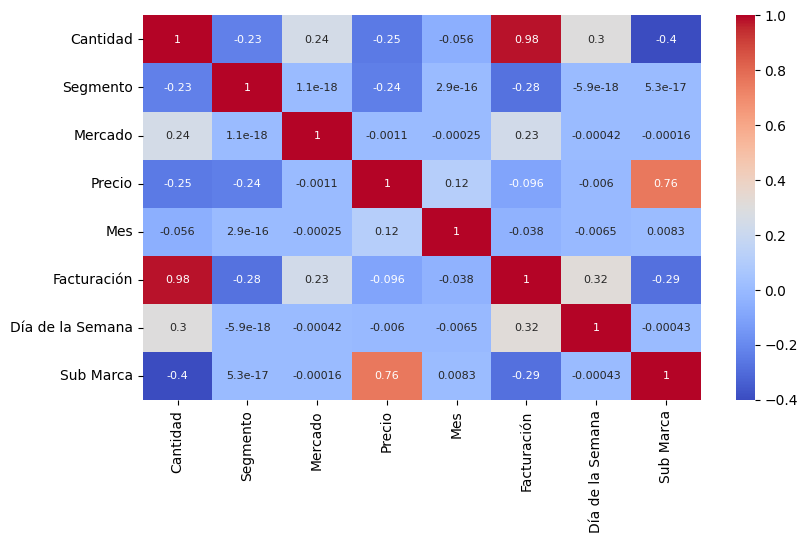

In [ ]:
plt.figure(figsize=(9, 5))
# Calcula la matriz de correlación
correlation_matrix = df_filtered.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 8})

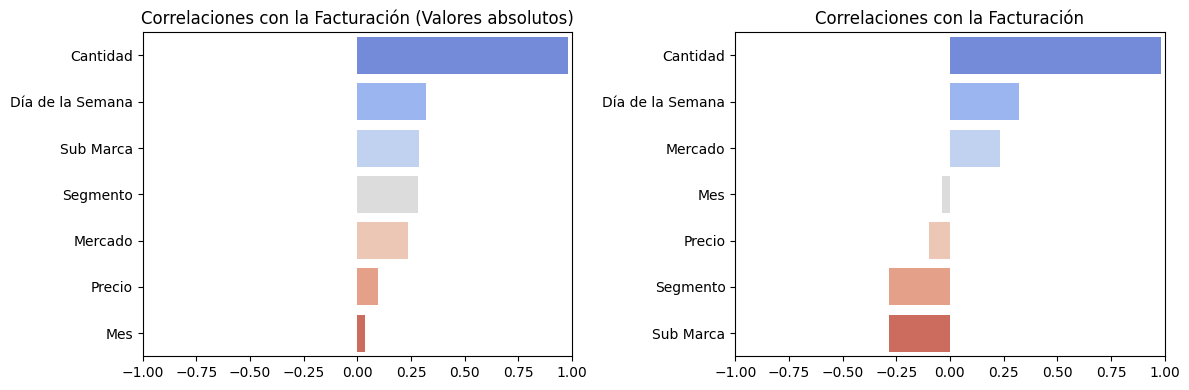

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras con valores absolutos de correlación
corr_facturacion_abs = correlation_matrix['Facturación'].abs().sort_values(ascending=False).drop('Facturación')
sns.barplot(x=corr_facturacion_abs.values, y=corr_facturacion_abs.index, ax=axes[0], palette='coolwarm')
axes[0].set_xlim(-1, 1)
axes[0].set_title('Correlaciones con la Facturación (Valores absolutos)')

# Gráfico de barras con correlaciones sin valores absolutos
corr_facturacion = correlation_matrix['Facturación'].sort_values(ascending=False).drop('Facturación')
sns.barplot(x=corr_facturacion.values, y=corr_facturacion.index, ax=axes[1], palette='coolwarm')
axes[1].set_xlim(-1, 1)
axes[1].set_title('Correlaciones con la Facturación')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

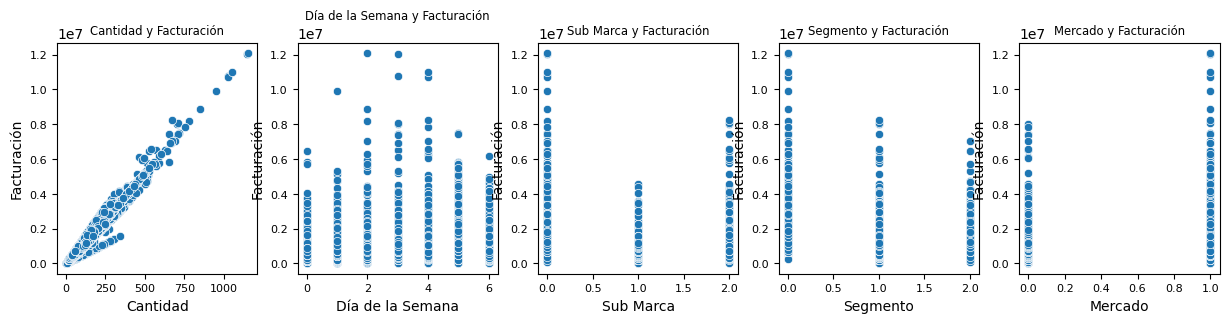

In [ ]:
# Analiza las variables con una correlación significativa con las ventas
corr_sales = correlation_matrix['Facturación'].abs().sort_values(ascending=False)
variables_influyentes = corr_sales[corr_sales > 0.1].index.tolist()
variables_influyentes.remove('Facturación')  # Excluye la variable "Cantidad"

# Configura el tamaño de la cuadrícula
num_subplots = len(variables_influyentes)
num_rows, num_cols = divmod(num_subplots, 5)
if num_cols == 0:
    num_cols = 5
else:
    num_rows += 1

# Crea la cuadrícula de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))
sns.set(font_scale=0.7)  # Ajusta el tamaño de fuente en los gráficos de dispersión

# Ajusta el número de subplots según la cuadrícula
axes = axes.flatten()[:num_subplots]

# Realiza un análisis más detallado de cada variable influyente
for i, variable in enumerate(variables_influyentes):
    # Visualiza la relación con las ventas utilizando un diagrama de dispersión
    sns.scatterplot(x=variable, y='Facturación', data=df_filtered, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_title(f'{variable} y Facturación')
    axes[i].tick_params(axis='both', which='both', labelsize=8)  # Ajusta el tamaño de la fuente de las marcas de los ejes

# Ajusta el espacio vertical entre los subplots
plt.subplots_adjust(hspace=0.4)

# Muestra los gráficos
plt.show()

Podemos ver que, obviamente, la cantidad vendida está asociada a la facturación (siendo que a más cantidad, mayor facturación), y siguiendo también lo que se dijo antes, los segmentos influyen en la facturación, corelaiconado con la submarca que vende cada segmento

El precio parece no tener influencia, al igual que el mes.

Pero podemos observar que el día de la semana ejercería cierta influencia, ya que en el gráfico se puede apreciar que se factura más en los días "intermedios" de la semana (miércoles, jueves y viernes), especialmente el miércoles.

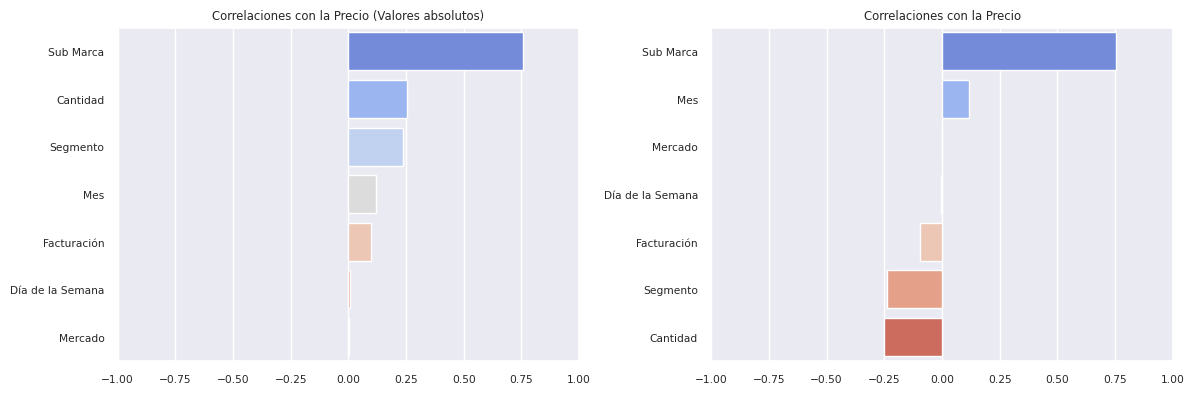

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras con valores absolutos de correlación
corr_facturacion_abs = correlation_matrix['Precio'].abs().sort_values(ascending=False).drop('Precio')
sns.barplot(x=corr_facturacion_abs.values, y=corr_facturacion_abs.index, ax=axes[0], palette='coolwarm')
axes[0].set_xlim(-1, 1)
axes[0].set_title('Correlaciones con la Precio (Valores absolutos)')

# Gráfico de barras con correlaciones sin valores absolutos
corr_facturacion = correlation_matrix['Precio'].sort_values(ascending=False).drop('Precio')
sns.barplot(x=corr_facturacion.values, y=corr_facturacion.index, ax=axes[1], palette='coolwarm')
axes[1].set_xlim(-1, 1)
axes[1].set_title('Correlaciones con la Precio')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

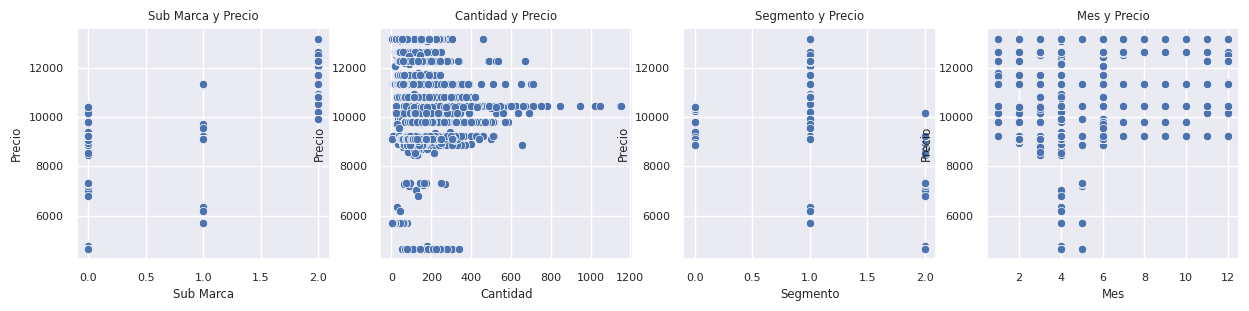

In [ ]:
# Analiza las variables con una correlación significativa con las ventas
corr_sales = correlation_matrix['Precio'].abs().sort_values(ascending=False)
variables_influyentes = corr_sales[corr_sales > 0.1].index.tolist()
variables_influyentes.remove('Precio')  # Excluye la variable "Cantidad"

# Configura el tamaño de la cuadrícula
num_subplots = len(variables_influyentes)
num_rows, num_cols = divmod(num_subplots, 5)
if num_cols == 0:
    num_cols = 5
else:
    num_rows += 1

# Crea la cuadrícula de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))
sns.set(font_scale=0.7)  # Ajusta el tamaño de fuente en los gráficos de dispersión

# Ajusta el número de subplots según la cuadrícula
axes = axes.flatten()[:num_subplots]

# Realiza un análisis más detallado de cada variable influyente
for i, variable in enumerate(variables_influyentes):
    # Visualiza la relación con las ventas utilizando un diagrama de dispersión
    sns.scatterplot(x=variable, y='Precio', data=df_filtered, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_title(f'{variable} y Precio')
    axes[i].tick_params(axis='both', which='both', labelsize=8)  # Ajusta el tamaño de la fuente de las marcas de los ejes

# Ajusta el espacio vertical entre los subplots
plt.subplots_adjust(hspace=0.4)

# Muestra los gráficos
plt.show()

Aca vemos que el precio se ve influenciado por el segmento del cual se vende y con la ssubmarcas respectivas

En este caso, los mercados y días de la semana no parecen influir, y el mes puede explicarse por la inflación.

### Con variables desglosadas

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Selecciona las variables de interés y elimina las que no necesitas
variables_interes = ['Cantidad', 'Segmento', 'Mercado', 'Precio', 'Año', 'Mes', 'Dia del Mes', 'Facturación', 'Día de la Semana', 'Sub Marca']
df_filtered = df_asics[variables_interes]

# Codifica las variables categóricas utilizando one-hot encoding y reemplaza las columnas originales
encoder = OneHotEncoder(sparse=False, drop=None)
encoded_features = encoder.fit_transform(df_filtered[['Segmento', 'Mercado', 'Sub Marca']])
encoded_columns = encoder.get_feature_names_out(['Segmento', 'Mercado', 'Sub Marca'])
df_filtered.drop(['Segmento', 'Mercado', 'Sub Marca'], axis=1, inplace=True)
df_filtered[encoded_columns] = encoded_features

encoder_ordinal = OrdinalEncoder(categories=[['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']])
df_filtered['Día de la Semana'] = encoder_ordinal.fit_transform(df_filtered[['Día de la Semana']])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-55-9540dbea16b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Segmento', 'Mercado', 'Sub Marca'], axis=1, inplace=True)
<ipython-input-55-9540dbea16b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[encoded_columns] = encoded_features
<ipython-i

<ipython-input-56-f9b4e2b47a0f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


<Axes: >

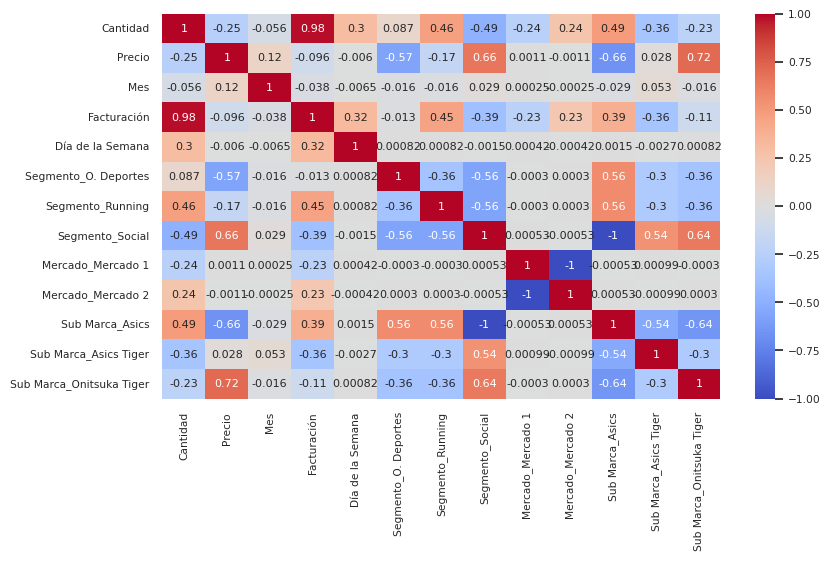

In [ ]:
plt.figure(figsize=(9, 5))
# Calcula la matriz de correlación
correlation_matrix = df_filtered.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 8})

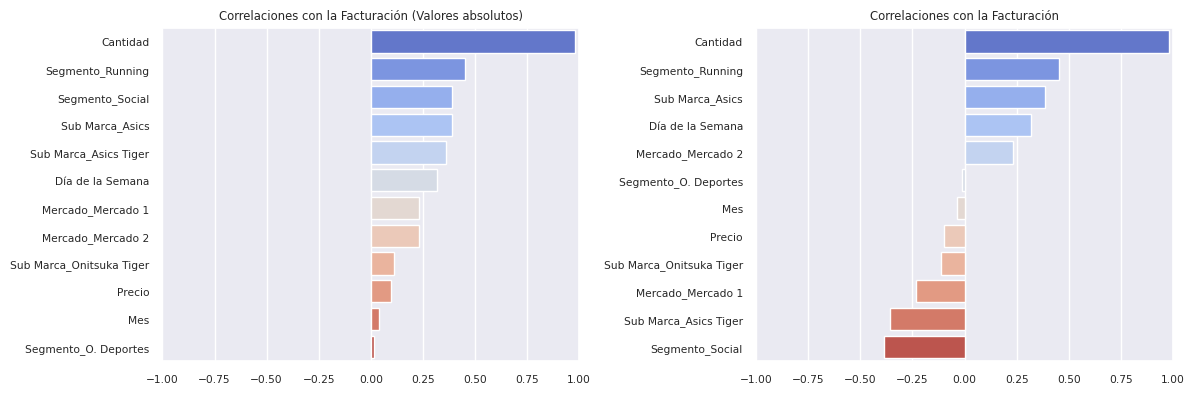

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras con valores absolutos de correlación
corr_facturacion_abs = correlation_matrix['Facturación'].abs().sort_values(ascending=False).drop('Facturación')
sns.barplot(x=corr_facturacion_abs.values, y=corr_facturacion_abs.index, ax=axes[0], palette='coolwarm')
axes[0].set_xlim(-1, 1)
axes[0].set_title('Correlaciones con la Facturación (Valores absolutos)')

# Gráfico de barras con correlaciones sin valores absolutos
corr_facturacion = correlation_matrix['Facturación'].sort_values(ascending=False).drop('Facturación')
sns.barplot(x=corr_facturacion.values, y=corr_facturacion.index, ax=axes[1], palette='coolwarm')
axes[1].set_xlim(-1, 1)
axes[1].set_title('Correlaciones con la Facturación')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


Podemos ver que, obviamente, la cantidad vendida está asociada a la facturación (siendo que a más cantidad, mayor facturación), y siguiendo también lo que se dijo antes, los segmentos influyen en la facturación. El segmento de running impacta positivamente en ella, mientras que el segmento social impacta negativamente (generando menos facturación). Dado que Asics vende productos de running, sucede lo mismo, al igual que con Tiger, que es de segmento social.

El precio parece tener muy poca influencia, al igual que el mes.

Pero podemos observar que el día de la semana ejercería cierta influencia, ya que en el gráfico se puede apreciar que se factura más en los días "intermedios" de la semana (miércoles, jueves y viernes), especialmente el miércoles.

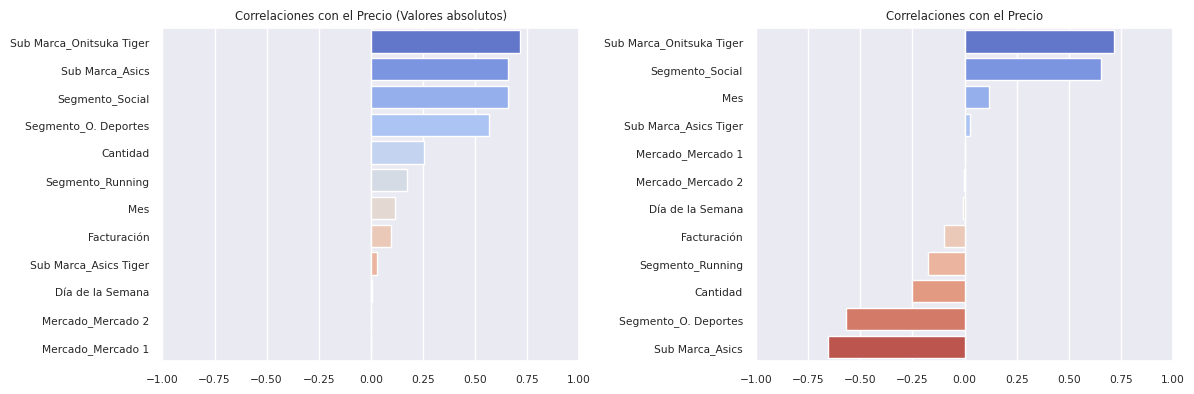

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras con valores absolutos de correlación
corr_facturacion_abs = correlation_matrix['Precio'].abs().sort_values(ascending=False).drop('Precio')
sns.barplot(x=corr_facturacion_abs.values, y=corr_facturacion_abs.index, ax=axes[0], palette='coolwarm')
axes[0].set_xlim(-1, 1)
axes[0].set_title('Correlaciones con el Precio (Valores absolutos)')

# Gráfico de barras con correlaciones sin valores absolutos
corr_facturacion = correlation_matrix['Precio'].sort_values(ascending=False).drop('Precio')
sns.barplot(x=corr_facturacion.values, y=corr_facturacion.index, ax=axes[1], palette='coolwarm')
axes[1].set_xlim(-1, 1)
axes[1].set_title('Correlaciones con el Precio')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

Aca vemos que el precio se ve influenciado por el segmento del cual se vende. El segmento social tiene el precio más alto (y en consecuencia, una de las submarcas, Onitsuka Tiger), mientras que el segmento de running es más económico pero no tanto, y el segmento de otros deportes (donde Asics es la submarca) tiene precios más bajos que los mencionados anteriormente.

En este caso, los mercados y días de la semana no parecen influir, y el mes puede explicarse por la inflación.

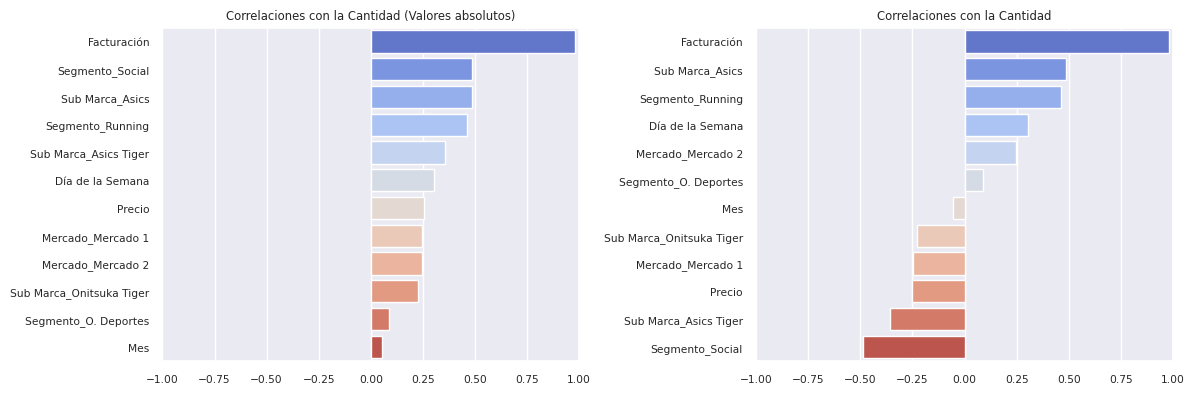

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras con valores absolutos de correlación
corr_facturacion_abs = correlation_matrix['Cantidad'].abs().sort_values(ascending=False).drop('Cantidad')
sns.barplot(x=corr_facturacion_abs.values, y=corr_facturacion_abs.index, ax=axes[0], palette='coolwarm')
axes[0].set_xlim(-1, 1)
axes[0].set_title('Correlaciones con la Cantidad (Valores absolutos)')

# Gráfico de barras con correlaciones sin valores absolutos
corr_facturacion = correlation_matrix['Cantidad'].sort_values(ascending=False).drop('Cantidad')
sns.barplot(x=corr_facturacion.values, y=corr_facturacion.index, ax=axes[1], palette='coolwarm')
axes[1].set_xlim(-1, 1)
axes[1].set_title('Correlaciones con la Cantidad')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

Bastante parecido a lo que se habló en facturación (siendo que ella está influenciada por la cantidad que se vende), el segmento implica una división en la cantidad vendida, ya que sus clientes más fieles son del running (y submarca asociada). Lo mismo ocurre con el día de la semana.

Podemos ver que el precio influye en la cantidad comprada/vendida, siendo que a menor precio se compra más.

In [ ]:
df_asics.groupby('Segmento').agg({'Cantidad': 'sum', 'Facturación': 'sum', 'Precio': 'mean'})

,Cantidad,Facturación,Precio
Segmento,,,
O. Deportes,246073,2.250954e+09,9115.492006
Running,350632,3.569449e+09,10155.109409
Social,237216,2.780049e+09,11735.084825


In [ ]:
df_asics.groupby('Sub Marca').agg({'Cantidad': 'sum', 'Facturación': 'sum', 'Precio': 'mean'})


,Cantidad,Facturación,Precio
Sub Marca,,,
Asics,596705,5.820403e+09,9635.300707
Asics Tiger,77911,8.112350e+08,10705.282878
Onitsuka Tiger,159305,1.968814e+09,12515.491683


In [ ]:
# Crear un DataFrame de ejemplo
data = {'Facturación': [5.820403e+09, 8.112350e+08, 1.968814e+09]}
df = pd.DataFrame(data)

# Establecer el formato para la columna de facturación
pd.options.display.float_format = '{:.2f}'.format

# Mostrar el DataFrame con la facturación sin notación científica
print(df)

    Facturación
0 5820403000.00
1  811235000.00
2 1968814000.00
